# Code Portfolio from my first coding class, CMSE 201

## Fundamentals

Mutable vs immutable objects: A mutable object can be changed once created such as lists and dictionaries, while an immutable object cannot be changed once creates such as strings, integers, and tuples

for vs while loops. Different ways to create loops in python. for loops will do an action for the length of the object. A while loop will go until a requirement is met. 

if then statements,

functions 

plotting 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

## Fundamental packages

### Numpy

In [4]:
import numpy as np #import function 
#object_name = np.loadtext('filename.csv',usecols,unpack=True,delimiter) #standard numpy function to load an excel file 

numpy has many useful functions for using math operations, and creating arrays. With examples such as np.std() for standard deviation

### Pandas

In [5]:
import pandas as pd #import function

In [6]:
#pandas_df = pd.read_csv('filename.csv, skiprows = int, delimter = ',')

Like numpy's loadtext function pandas has a similar function. However Pandas loads the object as a pandas dataframe and numpy creates an array. Pandas is built on top of numpy. Pandas is better for data visualization (cleaning and manipulation of data) while numpy is better for mathematics 

### Masking 

Masking is a tool that allows use to select specific parts of our data. Below is a basic example of when masking can be used and why it is efficient 

In [7]:
vals = np.array([3, 11, 6, 9, 7, 12, 8, 11, 5, 3, 15, 13]) #creates an array of values
higher=[] #creates an empty list, that is later filled in by the loop below
for i in vals: #loops through every value in the arry
    if i > 8: #if statement that only takes values higher than 
        higher.append(i) #appends all of those values to the empty list, one at a time   
print(higher)  
#below is code achieving the same task but using masking
mask = vals > 8 #the mask's requirement is being set at anyvalue above 8, note the masks values are boolean 
vals_masked = vals[mask] #creating the array of values above 8
print(vals_masked)

[11, 9, 12, 11, 15, 13]
[11  9 12 11 15 13]


## Fitting, Visualization, Agent based modeling

### Fitting

In [8]:
from scipy.optimize import curve_fit #importing a function from scipy

population growth model example formula 
P = population, C = Carrying capacity, k = growth rate coefficient

$$P(t) = \frac{C}{1 + Ae^{-kt}}$$

where 

$$A = \frac{C-P_{init}}{P_{init}}$$

[1.05555874e+09 1.15288852e+10 1.99605515e-02]


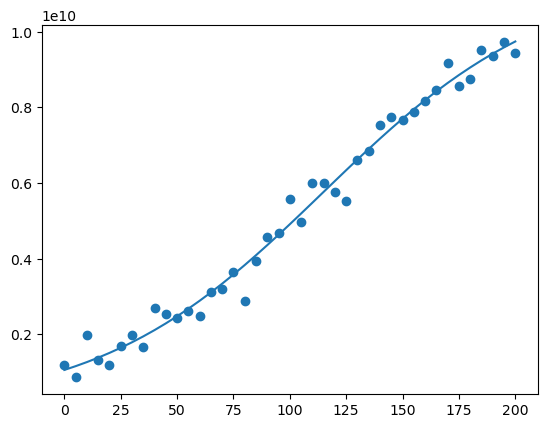

In [11]:
pop200 = pd.read_csv('pop200.csv') #reading in an example csv file/ this file is not in this github
x= pop200['time'] #masking time as the x variable
y=pop200['population'] #masking population as the y variable
plt.scatter(x,y) #plotting points from the csv file

def pequa(t,p,c,k): #defining the function
    a = (c-p)/p #eq 2
    p = c/(1+(a*np.exp(-1*k*t))) #eq 2
    return p #returning p(t)

popt, pcov = curve_fit(pequa,x,y,p0=[8*10**8,1*10**10,1]) #using our import function for a prediction model 
print(popt)
pval = popt[0]
cval = popt[1]
kval = popt[2]
fitline = pequa(x,pval,cval,kval)
plt.plot(x,fitline)

### ODE

Ordinary Differential equations and other numerical methods can be used to approximate the intergral of a Differential Eq. Using the same equations as above we will find the approximate answer using ODEs 

In [15]:
def pop_func_exact_sol(time,pinitial,bigc,littlek):
    a = (bigc - pinitial)/pinitial
    pop = bigc/(1 + a*np.exp(-1.0*littlek*time))
    return pop 
def derivs(p,k,c):
    der = k*p*(1-(p/c))
    return der

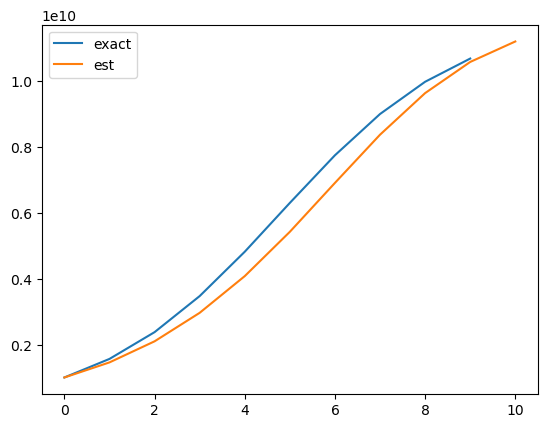

In [16]:
deltat = np.arange(0,500,50) #time steps from 0 to 450 with steps of 50
p0 = 1.0e9 
k1=.01
c1=1.2e10
newpop = 1.0e9
oldpop = 1.0e9
pop = [p0]
for i in deltat: 
    newpop = derivs(p=oldpop,k=k1,c=c1)*50+oldpop
    pop.append(newpop)
    oldpop=newpop
    
exact = pop_func_exact_sol(deltat, pinitial= 1e9, bigc = 1.2e10, littlek=.01)
plt.plot(exact, label='exact')
plt.plot(pop, label='est')
plt.legend()

## Image Analysis

Day 21-25 left to do 